In [664]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [666]:
df=pd.read_csv("housing.csv")

- DATA UNDERSTANDING

In [668]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [672]:
df.isnull().sum()

date              0
price             0
bedrooms          0
bathrooms         0
sqft_living      40
sqft_lot         14
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built         23
yr_renovated      0
street            0
city             57
statezip          0
country           0
dtype: int64

In [674]:
df["country"].value_counts()

country
USA    4600
Name: count, dtype: int64

In [676]:
df["city"].value_counts()

city
Seattle                1555
Renton                  289
Bellevue                283
Redmond                 234
Kirkland                185
Kent                    183
Issaquah                183
Auburn                  173
Sammamish               173
Federal Way             146
Shoreline               121
Woodinville             113
Maple Valley             95
Mercer Island            86
Burien                   74
Snoqualmie               69
Kenmore                  66
Des Moines               57
North Bend               48
Covington                43
Duvall                   42
Lake Forest Park         35
Newcastle                33
Bothell                  31
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                21
Normandy Park            17
Medina                   11
Clyde Hill               11
Fall City                10
Black Diamond             9
Ravensdale                7
Pacific        

In [678]:
df["statezip"].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [680]:
list(df["statezip"].unique())

['WA 98133',
 'WA 98119',
 'WA 98042',
 'WA 98008',
 'WA 98052',
 'WA 98115',
 'WA 98038',
 'WA 98045',
 'WA 98155',
 'WA 98105',
 'WA 98074',
 'WA 98106',
 'WA 98007',
 'WA 98092',
 'WA 98198',
 'WA 98006',
 'WA 98102',
 'WA 98011',
 'WA 98125',
 'WA 98003',
 'WA 98136',
 'WA 98033',
 'WA 98029',
 'WA 98117',
 'WA 98034',
 'WA 98072',
 'WA 98023',
 'WA 98107',
 'WA 98166',
 'WA 98116',
 'WA 98024',
 'WA 98055',
 'WA 98077',
 'WA 98027',
 'WA 98059',
 'WA 98075',
 'WA 98014',
 'WA 98065',
 'WA 98199',
 'WA 98053',
 'WA 98058',
 'WA 98122',
 'WA 98103',
 'WA 98112',
 'WA 98005',
 'WA 98118',
 'WA 98177',
 'WA 98004',
 'WA 98019',
 'WA 98144',
 'WA 98168',
 'WA 98001',
 'WA 98056',
 'WA 98146',
 'WA 98028',
 'WA 98148',
 'WA 98057',
 'WA 98040',
 'WA 98010',
 'WA 98051',
 'WA 98031',
 'WA 98109',
 'WA 98030',
 'WA 98126',
 'WA 98032',
 'WA 98178',
 'WA 98288',
 'WA 98108',
 'WA 98070',
 'WA 98188',
 'WA 98002',
 'WA 98039',
 'WA 98022',
 'WA 98068',
 'WA 98047',
 'WA 98050',
 'WA 98354']

In [682]:
df["yr_built"].value_counts()

yr_built
2006.0    111
2005.0    104
2007.0     93
2004.0     92
1978.0     90
         ... 
1915.0      6
1935.0      6
1933.0      5
1934.0      4
1936.0      3
Name: count, Length: 115, dtype: int64

In [684]:
list(df["yr_built"].unique())

[1955.0,
 1921.0,
 1966.0,
 1963.0,
 1976.0,
 1938.0,
 1989.0,
 1985.0,
 1945.0,
 1948.0,
 1909.0,
 1980.0,
 1939.0,
 1965.0,
 1956.0,
 1997.0,
 1987.0,
 1983.0,
 1923.0,
 1954.0,
 2005.0,
 1991.0,
 1959.0,
 1920.0,
 1979.0,
 1951.0,
 1967.0,
 2004.0,
 2014.0,
 1995.0,
 1944.0,
 1992.0,
 1957.0,
 1978.0,
 1974.0,
 1950.0,
 1990.0,
 1949.0,
 1968.0,
 1977.0,
 1996.0,
 2001.0,
 2000.0,
 1929.0,
 2006.0,
 2008.0,
 2009.0,
 2012.0,
 2013.0,
 2007.0,
 1986.0,
 1973.0,
 1988.0,
 1900.0,
 1928.0,
 1982.0,
 1960.0,
 2003.0,
 1998.0,
 1942.0,
 1908.0,
 1958.0,
 1971.0,
 1975.0,
 1961.0,
 1924.0,
 1902.0,
 1962.0,
 1953.0,
 1999.0,
 1994.0,
 1930.0,
 1984.0,
 2010.0,
 1912.0,
 1947.0,
 1916.0,
 1940.0,
 1970.0,
 1952.0,
 1964.0,
 1926.0,
 1905.0,
 1969.0,
 1903.0,
 1943.0,
 1993.0,
 1946.0,
 1910.0,
 1904.0,
 1981.0,
 1906.0,
 1922.0,
 2011.0,
 2002.0,
 1917.0,
 1913.0,
 1914.0,
 1937.0,
 1925.0,
 1932.0,
 1918.0,
 1972.0,
 1941.0,
 1919.0,
 1936.0,
 1911.0,
 1927.0,
 1931.0,
 1901.0,
 1907.0,
 

In [686]:
sorted(df['yr_built'].unique())

[1900.0,
 1901.0,
 1902.0,
 1903.0,
 1904.0,
 1905.0,
 1906.0,
 1907.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1912.0,
 1913.0,
 1914.0,
 1915.0,
 1916.0,
 1917.0,
 1918.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 

In [688]:
sorted(df['yr_renovated'].unique())

[0,
 1912,
 1913,
 1923,
 1934,
 1945,
 1948,
 1953,
 1954,
 1955,
 1956,
 1958,
 1960,
 1963,
 1966,
 1968,
 1969,
 1970,
 1971,
 1972,
 1974,
 1975,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

- DUPLICATE DATAFRAME CREATED

In [691]:
df2=df.copy(deep=True)

In [693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

- DUPICATES CHECKED

In [696]:
df.duplicated().sum()

0

In [698]:
df.columns.to_list()

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'street',
 'city',
 'statezip',
 'country']

 - COLUMN HEADER RENAMED

In [701]:
df=df.rename(columns= {'date':"REGISTERED_DATE",
 'price':"PRICE_OF_THE_HOUSE",
 'bedrooms':"BEDROOMS_COUNT",
 'bathrooms':"BATHROOMS_COUNT",
 'sqft_living':"HOUSE_SQFT",
 'sqft_lot':"TOTAL_LAND_SQFT",
 'floors':"FLOORS_COUNTS",
 'waterfront':"WATERFRONT_VIEWS",
 'view':"VIEW_RANKING",
 'condition':"CONDITION_RANKING",
 'sqft_above':"ABOVE_SQFT",
 'sqft_basement':"BASEMENT_SQFT",
 'yr_built':"YEAR_BUILT",
 'yr_renovated':"YEAR_RENOVATED",
 'street':"STREET_ADDRESS",
 'city':"CITY",
 'statezip':"STATEZIP",
 'country':"COUNTRY"
                        }
              )

In [703]:
df.head()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,ABOVE_SQFT,BASEMENT_SQFT,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [705]:
 df.tail()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,ABOVE_SQFT,BASEMENT_SQFT,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY
4595,09/07/2014 0:00,308166.6667,3,1.75,1510.0,6360.0,1.0,0,0,4,1510,0,NaN,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09/07/2014 0:00,534333.3333,3,2.50,1460.0,7573.0,2.0,0,0,3,1460,0,NaN,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09/07/2014 0:00,416904.1667,3,2.50,3010.0,7014.0,2.0,0,0,3,3010,0,NaN,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10/07/2014 0:00,203400.0000,4,2.00,2090.0,6630.0,1.0,0,0,3,1070,1020,NaN,0,5148 S Creston St,Seattle,WA 98178,USA
4599,10/07/2014 0:00,220600.0000,3,2.50,1490.0,8102.0,2.0,0,0,4,1490,0,NaN,0,18717 SE 258th St,Covington,WA 98042,USA


In [707]:
df.isnull().sum()

REGISTERED_DATE        0
PRICE_OF_THE_HOUSE     0
BEDROOMS_COUNT         0
BATHROOMS_COUNT        0
HOUSE_SQFT            40
TOTAL_LAND_SQFT       14
FLOORS_COUNTS          0
WATERFRONT_VIEWS       0
VIEW_RANKING           0
CONDITION_RANKING      0
ABOVE_SQFT             0
BASEMENT_SQFT          0
YEAR_BUILT            23
YEAR_RENOVATED         0
STREET_ADDRESS         0
CITY                  57
STATEZIP               0
COUNTRY                0
dtype: int64

- NULL DROPPED

In [710]:
df.dropna(inplace=True)

- DATE FORMAT CHANGED FOR REGISTERED DATE

In [713]:
df["REGISTERED_DATE"] = pd.to_datetime(df["REGISTERED_DATE"],dayfirst=True,format='%d-%m-%Y')

In [715]:
def date_cleaning_function(date):
    date_of=date.strftime('%d-%m-%Y')
    return date_of

In [717]:
df["REGISTERED_DATE"]=df["REGISTERED_DATE"].apply(date_cleaning_function)

In [719]:
df["REGISTERED_DATE"] = pd.to_datetime(df["REGISTERED_DATE"],dayfirst=True,format='%d-%m-%Y')

In [721]:
df.head()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,ABOVE_SQFT,BASEMENT_SQFT,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY
67,2014-05-03,310000.0,3,1.0,1010.0,9945.0,1.0,0,0,4,1010,0,1973.0,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA
68,2014-05-04,775000.0,2,2.5,2680.0,7392.0,1.0,0,0,3,2680,0,2004.0,2003,13134 234th Ct NE,Redmond,WA 98053,USA
69,2014-05-04,365000.0,3,2.5,2200.0,7350.0,1.0,0,0,5,1570,630,1988.0,0,13420 SE 182nd St,Renton,WA 98058,USA
70,2014-05-04,331950.0,4,2.5,2530.0,9933.0,2.0,0,2,3,2010,520,1990.0,2009,925 48th Ct,Auburn,WA 98092,USA
71,2014-05-04,783500.0,3,2.5,2850.0,7130.0,2.0,0,0,3,1990,860,1980.0,0,151 Euclid Ave,Seattle,WA 98122,USA


In [723]:
df["CONDITION_RANKING"].value_counts()

CONDITION_RANKING
3    2825
4    1219
5     429
2      31
1       6
Name: count, dtype: int64

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4510 entries, 67 to 4576
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   REGISTERED_DATE     4510 non-null   datetime64[ns]
 1   PRICE_OF_THE_HOUSE  4510 non-null   float64       
 2   BEDROOMS_COUNT      4510 non-null   int64         
 3   BATHROOMS_COUNT     4510 non-null   float64       
 4   HOUSE_SQFT          4510 non-null   float64       
 5   TOTAL_LAND_SQFT     4510 non-null   float64       
 6   FLOORS_COUNTS       4510 non-null   float64       
 7   WATERFRONT_VIEWS    4510 non-null   int64         
 8   VIEW_RANKING        4510 non-null   int64         
 9   CONDITION_RANKING   4510 non-null   int64         
 10  ABOVE_SQFT          4510 non-null   int64         
 11  BASEMENT_SQFT       4510 non-null   int64         
 12  YEAR_BUILT          4510 non-null   float64       
 13  YEAR_RENOVATED      4510 non-null   int64         
 

- DATA TYPES CHANGED

In [728]:
df["YEAR_BUILT"]=df["YEAR_BUILT"].astype(int)
df['YEAR_RENOVATED'] = df['YEAR_RENOVATED'].astype(int)

In [730]:
df["BATHROOMS_COUNT"]=np.ceil(df["BATHROOMS_COUNT"]).astype(int)

In [732]:
df["FLOORS_COUNTS"]=np.ceil(df["FLOORS_COUNTS"]).astype(int)

- ML LANGUAGE TO NORMAL LANGUAGE COLUMNS CREATED

In [735]:
df["WATERFRONT_RANKING"] = df["WATERFRONT_VIEWS"].apply(lambda x: 'Yes' if x == 1 else 'No')

In [737]:
df["VIEWS_CATEGORY"]=df["VIEW_RANKING"].map({0: 'Poor', 1: 'Fair', 2: 'Average', 3: 'Good', 4: 'Excellent'})

In [739]:
df["CONDITION_CATEGORY"]=df["CONDITION_RANKING"].map({0: 'Very-Poor', 1: 'Poor', 2: 'Fair', 3: 'Average', 4: 'Good', 5:"Excellent"})

- IN PRICE_OF_THE_HOUSE REPLACED ZEROS WITH THEIR MEDIAN VALUES

In [742]:
df[df["PRICE_OF_THE_HOUSE"] !=0]["PRICE_OF_THE_HOUSE"].value_counts()

PRICE_OF_THE_HOUSE
300000.000     41
400000.000     30
450000.000     29
600000.000     29
440000.000     28
               ..
1339000.000     1
288350.000      1
250250.000      1
539950.000      1
1288333.333     1
Name: count, Length: 1710, dtype: int64

In [744]:
Non_zero_price=df[df["PRICE_OF_THE_HOUSE"] !=0]["PRICE_OF_THE_HOUSE"]

In [746]:
Non_zero_price

67      3.100000e+05
68      7.750000e+05
69      3.650000e+05
70      3.319500e+05
71      7.835000e+05
            ...     
4570    3.180000e+05
4571    5.506071e+05
4572    1.288333e+06
4573    5.840000e+05
4576    2.450000e+05
Name: PRICE_OF_THE_HOUSE, Length: 4462, dtype: float64

In [748]:
Non_zero_price_df = df[df["PRICE_OF_THE_HOUSE"] != 0][["PRICE_OF_THE_HOUSE"]]

In [750]:
Non_zero_price_df

,PRICE_OF_THE_HOUSE
67,3.100000e+05
68,7.750000e+05
69,3.650000e+05
70,3.319500e+05
71,7.835000e+05
...,...
4570,3.180000e+05
4571,5.506071e+05
4572,1.288333e+06
4573,5.840000e+05


In [752]:
Non_zero_price_df.median()

PRICE_OF_THE_HOUSE    465000.0
dtype: float64

In [754]:
NON_ZER0_MEDIAN=Non_zero_price_df.median()

In [756]:
NON_ZER0_MEDIAN

PRICE_OF_THE_HOUSE    465000.0
dtype: float64

In [758]:
df["PRICE_OF_THE_HOUSE"]=df["PRICE_OF_THE_HOUSE"].replace(0,465000.0)

In [760]:
(df["PRICE_OF_THE_HOUSE"] == 0).value_counts()

PRICE_OF_THE_HOUSE
False    4510
Name: count, dtype: int64

In [762]:
df["PRICE_OF_THE_HOUSE"]

67       310000.000
68       775000.000
69       365000.000
70       331950.000
71       783500.000
           ...     
4572    1288333.333
4573     584000.000
4574     465000.000
4575     465000.000
4576     245000.000
Name: PRICE_OF_THE_HOUSE, Length: 4510, dtype: float64

In [764]:
df["PRICE_OF_THE_HOUSE"]=np.ceil(df["PRICE_OF_THE_HOUSE"]).astype(int)

In [766]:
df.tail()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,...,BASEMENT_SQFT,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY,WATERFRONT_RANKING,VIEWS_CATEGORY,CONDITION_CATEGORY
4572,2014-07-02,1288334,6,5,3830.0,4800.0,3,0,0,3,...,780,1919,2004,2425 3rd Ave W,Seattle,WA 98119,USA,No,Poor,Average
4573,2014-07-02,584000,3,2,1490.0,1036.0,2,0,0,3,...,400,2008,0,4304B 36th Ave W,Seattle,WA 98199,USA,No,Poor,Average
4574,2014-07-02,465000,3,1,1520.0,9030.0,1,0,0,3,...,0,1956,2001,2533 155th Pl SE,Bellevue,WA 98007,USA,No,Poor,Average
4575,2014-07-02,465000,5,7,8020.0,21738.0,2,0,0,3,...,0,2001,0,2 Crescent Key,Bellevue,WA 98006,USA,No,Poor,Average
4576,2014-07-02,245000,3,3,2470.0,7410.0,2,0,0,5,...,610,1977,0,8833 Earl Ave NW,Seattle,WA 98117,USA,No,Poor,Excellent


In [768]:
print(df.iloc[4356])

REGISTERED_DATE       2014-05-28 00:00:00
PRICE_OF_THE_HOUSE                 341750
BEDROOMS_COUNT                          3
BATHROOMS_COUNT                         3
HOUSE_SQFT                         2180.0
TOTAL_LAND_SQFT                    7741.0
FLOORS_COUNTS                           2
WATERFRONT_VIEWS                        0
VIEW_RANKING                            0
CONDITION_RANKING                       3
ABOVE_SQFT                           2180
BASEMENT_SQFT                           0
YEAR_BUILT                           1986
YEAR_RENOVATED                          0
STREET_ADDRESS          4315 201st Ave NE
CITY                            Sammamish
STATEZIP                         WA 98074
COUNTRY                               USA
WATERFRONT_RANKING                     No
VIEWS_CATEGORY                       Poor
CONDITION_CATEGORY                Average
Name: 4423, dtype: object


- RESETED INDEX VALUES

In [771]:
df = df.reset_index(drop=True)

In [773]:
df.head()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,...,BASEMENT_SQFT,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY,WATERFRONT_RANKING,VIEWS_CATEGORY,CONDITION_CATEGORY
0,2014-05-03,310000,3,1,1010.0,9945.0,1,0,0,4,...,0,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,No,Poor,Good
1,2014-05-04,775000,2,3,2680.0,7392.0,1,0,0,3,...,0,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,No,Poor,Average
2,2014-05-04,365000,3,3,2200.0,7350.0,1,0,0,5,...,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,No,Poor,Excellent
3,2014-05-04,331950,4,3,2530.0,9933.0,2,0,2,3,...,520,1990,2009,925 48th Ct,Auburn,WA 98092,USA,No,Average,Average
4,2014-05-04,783500,3,3,2850.0,7130.0,2,0,0,3,...,860,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,No,Poor,Average


- STATISTICS

In [776]:
df.describe()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,ABOVE_SQFT,BASEMENT_SQFT,YEAR_BUILT,YEAR_RENOVATED
count,4510,4.510000e+03,4510.000000,4510.000000,4510.000000,4.510000e+03,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000,4510.000000
mean,2014-06-07 12:22:59.334811392,5.582717e+05,3.402882,2.493126,2141.613747,1.488603e+04,1.565632,0.007095,0.241242,3.450998,1842.347894,313.096452,1970.782483,807.989135
min,2014-05-02 00:00:00,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,350.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.284422e+05,3.000000,2.000000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.650000e+05,3.000000,3.000000,1980.000000,7.681500e+03,2.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.574000e+05,4.000000,3.000000,2620.000000,1.100375e+04,2.000000,0.000000,0.000000,4.000000,2302.250000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,4.000000,1.000000,4.000000,5.000000,20450.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.650707e+05,0.911590,0.935878,967.414265,3.614797e+04,0.567094,0.083944,0.779183,0.677993,974.815301,465.547668,29.774787,979.345701


In [778]:
df["PRICE_OF_THE_HOUSE"].describe()

count    4.510000e+03
mean     5.582717e+05
std      5.650707e+05
min      7.800000e+03
25%      3.284422e+05
50%      4.650000e+05
75%      6.574000e+05
max      2.659000e+07
Name: PRICE_OF_THE_HOUSE, dtype: float64

- DIFFERENCE OF YEAR BUILT AND RENOVATED

In [781]:
(df["YEAR_BUILT"] == 0).sum()

0

In [783]:
(df["YEAR_RENOVATED"] == 0).sum()

2683

In [785]:
def year_difference(data1,data2):
    if(data2==0):
        return "NOT RENOVATED YET"
    else:
        year_gap=data2-data1
        return year_gap

In [787]:
df['YEAR_DIFFERENCE'] = np.where(df["YEAR_RENOVATED"] == 0, "NOT RENOVATED YET", df["YEAR_RENOVATED"]-df["YEAR_BUILT"] )

In [789]:
greter_years=df[df["YEAR_RENOVATED"]<df["YEAR_BUILT"]]

In [791]:
greter_years

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,...,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY,WATERFRONT_RANKING,VIEWS_CATEGORY,CONDITION_CATEGORY,YEAR_DIFFERENCE
0,2014-05-03,310000,3,1,1010.0,9945.0,1,0,0,4,...,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,No,Poor,Good,NOT RENOVATED YET
1,2014-05-04,775000,2,3,2680.0,7392.0,1,0,0,3,...,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,No,Poor,Average,-1
2,2014-05-04,365000,3,3,2200.0,7350.0,1,0,0,5,...,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,No,Poor,Excellent,NOT RENOVATED YET
4,2014-05-04,783500,3,3,2850.0,7130.0,2,0,0,3,...,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,No,Poor,Average,NOT RENOVATED YET
8,2014-05-05,531000,2,3,1270.0,1175.0,2,0,0,3,...,2000,0,1411 N 48th St,Seattle,WA 98103,USA,No,Poor,Average,NOT RENOVATED YET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,2014-07-02,268972,4,3,1954.0,4805.0,2,0,0,3,...,2005,0,19320 113th Ave SE,Kent,WA 98031,USA,No,Poor,Average,NOT RENOVATED YET
4503,2014-07-02,318000,2,2,1530.0,3503.0,1,0,1,4,...,1916,0,1922 11th Ave W,Seattle,WA 98119,USA,No,Fair,Good,NOT RENOVATED YET
4506,2014-07-02,584000,3,2,1490.0,1036.0,2,0,0,3,...,2008,0,4304B 36th Ave W,Seattle,WA 98199,USA,No,Poor,Average,NOT RENOVATED YET
4508,2014-07-02,465000,5,7,8020.0,21738.0,2,0,0,3,...,2001,0,2 Crescent Key,Bellevue,WA 98006,USA,No,Poor,Average,NOT RENOVATED YET


In [793]:
df[df["YEAR_BUILT"] == 0].shape

(0, 22)

OUTLIERS

In [796]:
print("Summary Statistics:")
print("\n")
print(df['PRICE_OF_THE_HOUSE'].describe())
print("\n")
print(df['HOUSE_SQFT'].describe())
print("\n")
print(df['TOTAL_LAND_SQFT'].describe())
print("\n")
print(df['ABOVE_SQFT'].describe())
print("\n")
print(df['BASEMENT_SQFT'].describe())

Summary Statistics:


count    4.510000e+03
mean     5.582717e+05
std      5.650707e+05
min      7.800000e+03
25%      3.284422e+05
50%      4.650000e+05
75%      6.574000e+05
max      2.659000e+07
Name: PRICE_OF_THE_HOUSE, dtype: float64


count     4510.000000
mean      2141.613747
std        967.414265
min        370.000000
25%       1460.000000
50%       1980.000000
75%       2620.000000
max      13540.000000
Name: HOUSE_SQFT, dtype: float64


count    4.510000e+03
mean     1.488603e+04
std      3.614797e+04
min      6.380000e+02
25%      5.000000e+03
50%      7.681500e+03
75%      1.100375e+04
max      1.074218e+06
Name: TOTAL_LAND_SQFT, dtype: float64


count     4510.000000
mean      1842.347894
std        974.815301
min        350.000000
25%       1190.000000
50%       1590.000000
75%       2302.250000
max      20450.000000
Name: ABOVE_SQFT, dtype: float64


count    4510.000000
mean      313.096452
std       465.547668
min         0.000000
25%         0.000000
50%         0.00

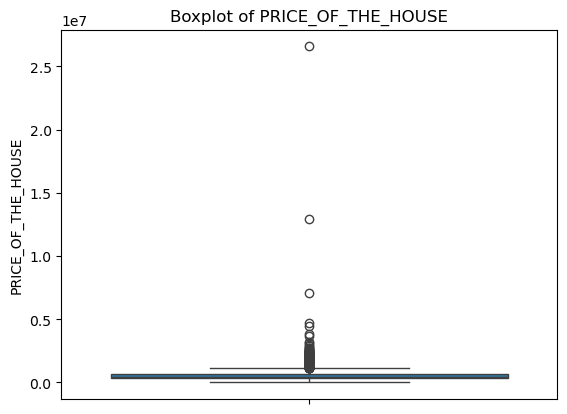

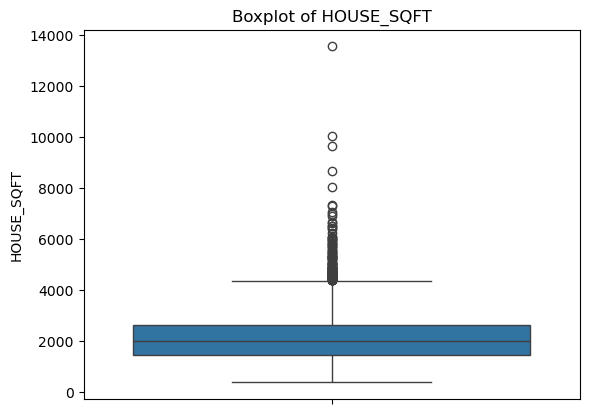

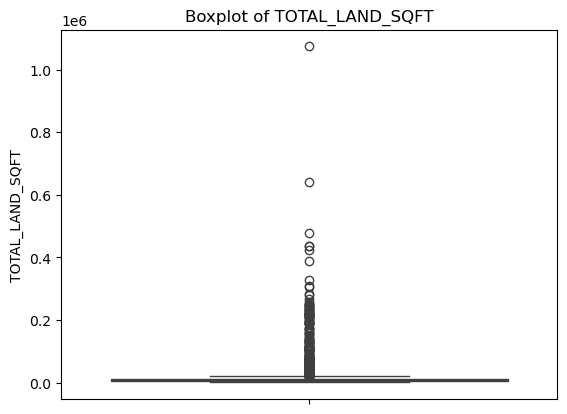

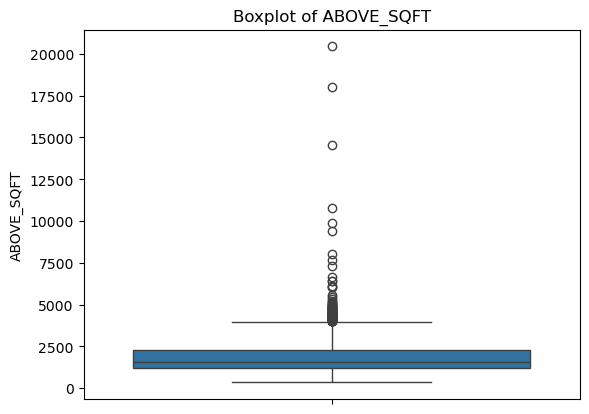

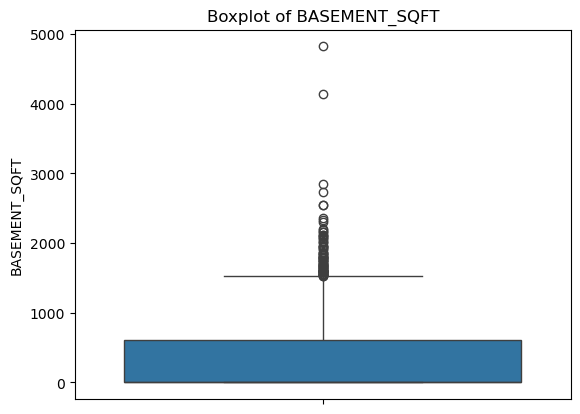

In [798]:
checking_cloumns=['PRICE_OF_THE_HOUSE','HOUSE_SQFT','TOTAL_LAND_SQFT','ABOVE_SQFT','BASEMENT_SQFT']

for i in checking_cloumns:
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [800]:
def outliers_removing_function(df,columns,inplace=True):
    for i in columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    return df

In [802]:
df=outliers_removing_function(df,checking_cloumns)

In [804]:
df

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,...,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY,WATERFRONT_RANKING,VIEWS_CATEGORY,CONDITION_CATEGORY,YEAR_DIFFERENCE
0,2014-05-03,310000,3,1,1010.0,9945.0,1,0,0,4,...,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,No,Poor,Good,NOT RENOVATED YET
1,2014-05-04,775000,2,3,2680.0,7392.0,1,0,0,3,...,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,No,Poor,Average,-1
2,2014-05-04,365000,3,3,2200.0,7350.0,1,0,0,5,...,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,No,Poor,Excellent,NOT RENOVATED YET
3,2014-05-04,331950,4,3,2530.0,9933.0,2,0,2,3,...,1990,2009,925 48th Ct,Auburn,WA 98092,USA,No,Average,Average,19
4,2014-05-04,783500,3,3,2850.0,7130.0,2,0,0,3,...,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,No,Poor,Average,NOT RENOVATED YET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,2014-07-02,318000,2,2,1530.0,3503.0,1,0,1,4,...,1916,0,1922 11th Ave W,Seattle,WA 98119,USA,No,Fair,Good,NOT RENOVATED YET
4504,2014-07-02,550608,4,2,1660.0,4800.0,2,0,0,3,...,1922,2008,4007 Woodland Park Ave N,Seattle,WA 98103,USA,No,Poor,Average,86
4506,2014-07-02,584000,3,2,1490.0,1036.0,2,0,0,3,...,2008,0,4304B 36th Ave W,Seattle,WA 98199,USA,No,Poor,Average,NOT RENOVATED YET
4507,2014-07-02,465000,3,1,1520.0,9030.0,1,0,0,3,...,1956,2001,2533 155th Pl SE,Bellevue,WA 98007,USA,No,Poor,Average,45


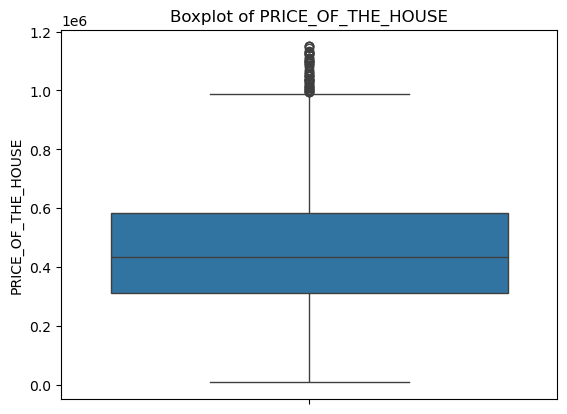

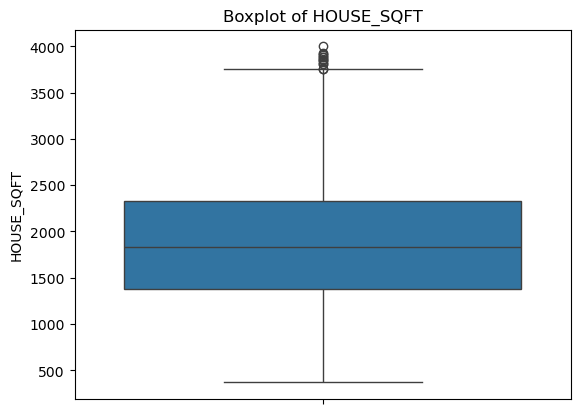

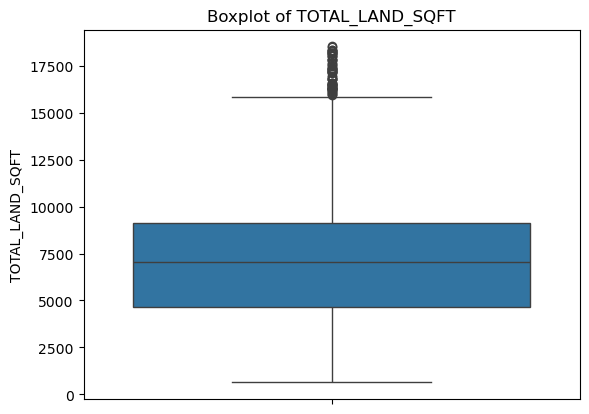

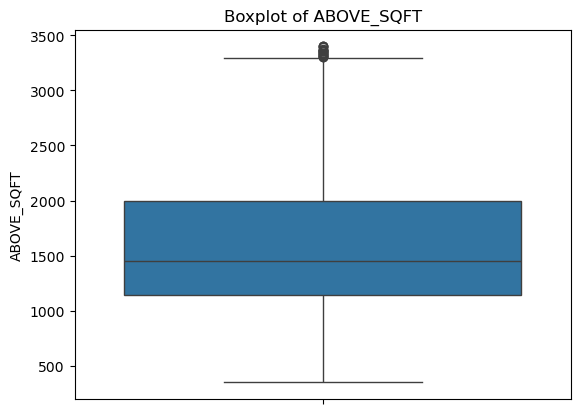

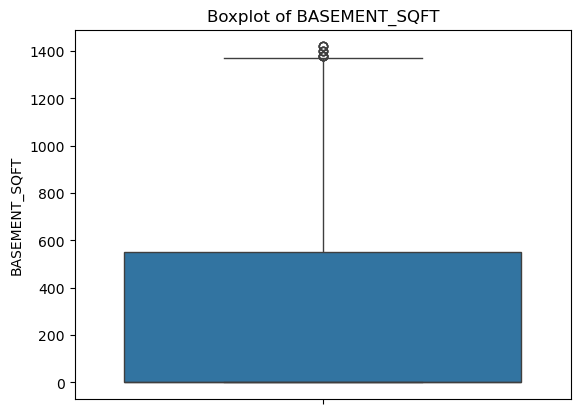

In [806]:
checked_columns=["PRICE_OF_THE_HOUSE","HOUSE_SQFT","TOTAL_LAND_SQFT","ABOVE_SQFT","BASEMENT_SQFT"]
for i in checked_columns:
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()

In [808]:
df = df.reset_index(drop=True)

In [810]:
df.head()

,REGISTERED_DATE,PRICE_OF_THE_HOUSE,BEDROOMS_COUNT,BATHROOMS_COUNT,HOUSE_SQFT,TOTAL_LAND_SQFT,FLOORS_COUNTS,WATERFRONT_VIEWS,VIEW_RANKING,CONDITION_RANKING,...,YEAR_BUILT,YEAR_RENOVATED,STREET_ADDRESS,CITY,STATEZIP,COUNTRY,WATERFRONT_RANKING,VIEWS_CATEGORY,CONDITION_CATEGORY,YEAR_DIFFERENCE
0,2014-05-03,310000,3,1,1010.0,9945.0,1,0,0,4,...,1973,0,7528 N Fork Rd SE,Snoqualmie,WA 98065,USA,No,Poor,Good,NOT RENOVATED YET
1,2014-05-04,775000,2,3,2680.0,7392.0,1,0,0,3,...,2004,2003,13134 234th Ct NE,Redmond,WA 98053,USA,No,Poor,Average,-1
2,2014-05-04,365000,3,3,2200.0,7350.0,1,0,0,5,...,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,No,Poor,Excellent,NOT RENOVATED YET
3,2014-05-04,331950,4,3,2530.0,9933.0,2,0,2,3,...,1990,2009,925 48th Ct,Auburn,WA 98092,USA,No,Average,Average,19
4,2014-05-04,783500,3,3,2850.0,7130.0,2,0,0,3,...,1980,0,151 Euclid Ave,Seattle,WA 98122,USA,No,Poor,Average,NOT RENOVATED YET


In [812]:
df.to_csv('cleaned_Housing.csv', index=False)